<a href="https://colab.research.google.com/github/programacaodinamica/mini-projetos/blob/master/notebooks/EstruturandoDadosTexto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RASPAGEM de TEXTOS dos Pronunciamentos do Presidente

Neste vídeo, realizamos uma raspagem de texto dos pronunciamentos do presidente da República utilizando a linguagem de programação Python e o pacote BeautifulSoup. Nosso objetivo é transformar dados não estruturados como, por exemplo, textos livres na internet ou em arquivos PDF, em dados estruturados no formato JSON. Estes textos podem ser fontes de dados importantes caso desejemos fazer mineração de dados e análise de texto para identificar padrões nas comunicações oficiais do atual presidente. Confira o vídeo e o código abaixo:


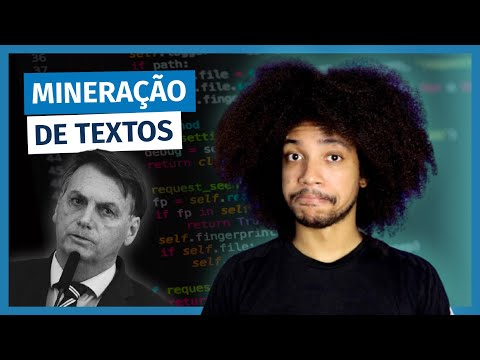

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('UlBlbDXh9mc')

## 0. Importando os módulos que precisaremos

In [ ]:
import json
import os
import requests
from bs4 import BeautifulSoup

## Acessando o site do governo com as transcrições dos pronunciamentos

In [ ]:
BASE_URL = "https://www.gov.br/planalto/pt-br/acompanhe-o-planalto/pronunciamentos/pronunciamentos-do-presidente-da-republica"
DATA_DIR = "pronunciamentos"

In [ ]:
response = requests.get(BASE_URL)

In [ ]:
# html recebido como resposta da requisição
response.text

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="pt-br" xml:lang="pt-br">\n  <head><script id="viewlet-appd" type="text/javascript" src="https://eum.appmon.serpro.gov.br/EUM/EUM-AAB-AUY/appdynamics.js?v=9506db872f2f9f91b83ece6f35484d0a"></script>\n        <script type="application/ld+json">\n        {\n            "@context": "https://schema.org",\n            "@type": "Organization",\n            "url": "https://www.gov.br/planalto",\n            "logo": "https://www.gov.br/planalto/logo.png"\n        }</script>\n        <script type="application/ld+json">\n        {\n            "@context": "https://schema.org",\n            "@type": "WebSite",\n            "url": "https://www.gov.br/planalto",\n            "potentialAction": {\n              "@type": "SearchAction",\n              "target": "https://www.gov.br/planalto/search?SearchableText={search_term_string}",\n              "query-input": "required name=search_term_string"\n            }\n        }</script>\n<s

In [ ]:
bs = BeautifulSoup(response.text)

In [ ]:
# todas as tags <article/>
articles = bs.find_all("article")

In [ ]:
articles[0]

<article class="tileItem visualIEFloatFix tile-document">
<div class="tileContent">
<h2 class="tileHeadline">
<a class="summary url" href="https://www.gov.br/planalto/pt-br/acompanhe-o-planalto/pronunciamentos/pronunciamentos-do-presidente-da-republica/pronunciamento-do-presidente-da-republica-jair-bolsonaro-em-cadeia-de-radio-e-televisao-brasilia-df" title="Document">Pronunciamento do Senhor Presidente da República, Jair Bolsonaro, em cadeia de rádio e televisão</a>
</h2>
<div class="keywords">
              tags:
              <span>
<a class="link-category" href="https://www.gov.br/planalto/@@search?Subject:list=Pronunciamento" rel="nofollow tag">Pronunciamento</a>
</span>
<span>
<a class="link-category" href="https://www.gov.br/planalto/@@search?Subject:list=Presidente" rel="nofollow tag">Presidente</a>
</span>
<span>
<a class="link-category" href="https://www.gov.br/planalto/@@search?Subject:list=Nova Previdência" rel="nofollow tag">Nova Previdência</a>
</span>
</div>
</div>
<span

In [ ]:
# quantidade total de pronunciamentos
len(articles)

17

## Organizando cada pronunciamento como um objeto Python

In [ ]:
def canonical_date(datestr):
  return "".join(reversed(datestr.split("/")))

In [ ]:
class Pronouncement:
  def __init__(self, bs_article=None):
    
    if bs_article is not None:
      self.url = bs_article.find(class_="summary url")["href"]
      self.tags = [t.text for t in bs_article.find_all(rel="tag")] 
      
      datetime = bs_article.find_all(class_="summary-view-icon")
      self.date = canonical_date(datetime[0].text.strip())
      self.time =  datetime[1].text.strip()

      self.text = self._extract_text()

  def _extract_text(self):
    r = requests.get(self.url)
    bs = BeautifulSoup(r.text)
    return bs.find(id="parent-fieldname-text").text.strip()

  def save_tojson(p, savedir, name=None):
    if name is None:
      name = f"{p.date}-{p.time}.json"
    path = os.path.join(savedir, name)
    with open(path, "w") as jsonfile:
      json.dump(p.__dict__, jsonfile)

  def load_fromjson(filepath):
    with open(filepath, "r") as jsonfile:
      data = json.load(jsonfile)
      p = Pronouncement()
      p.date = data["date"]
      p.time = data["time"]
      p.tags = data["tags"]
      p.url = data["url"]
      p.text = data["text"]
      return p

## Armazenando os pronunciamentos como dados estruturados em arquivos JSON

In [ ]:
pronouncements = [Pronouncement(art) for art in articles]

In [ ]:
for p in pronouncements:
  Pronouncement.save_tojson(p, DATA_DIR)

In [ ]:
len(pronouncements)

17

## Lendo os arquivos JSON e recuperando os objetos que representam pronunciamentos

In [ ]:
filenames = os.listdir(DATA_DIR)

In [ ]:
pronunciamentos = []
for name in filenames:
  path = os.path.join(DATA_DIR, name)
  pronunciamentos.append(Pronouncement.load_fromjson(path))

In [ ]:
len(pronunciamentos)

17

In [ ]:
for i in range(2, 8, 2):
  print(pronunciamentos[i].text)
  print("==========================")

Brasília/DF, 20 de fevereiro de 2019
 
          Boa noite. Estamos determinados a mudar o rumo do nosso País. Nosso objetivos são claros: resgatar nossa segurança, fazer a economia crescer e servir a quem realmente manda no País: a população brasileira.
          Sendo assim, ontem encaminhamos ao Congresso um pacote anticrime e hoje iniciamos o processo de criação de uma nova Previdência.
          É fundamental equilibrarmos as contas do País para que o sistema não quebre, como já aconteceu com outros países e alguns estados brasileiros. Precisamos garantir que hoje e sempre todos receberão seus benefícios em dia e o governo tenha recursos para ampliar investimentos na melhoria de vida da população e na geração de empregos.
          A nova Previdência será justa para todos, sem privilégios. Ricos e pobres, servidores públicos, políticos ou trabalhadores privados, todos seguirão as mesmas regras de idade e tempo de contribuição.
          Também haverá a reforma do sistema de proteç

## Conclusão

Com os dados armazenados e estruturados, não precisaremos mais requisitá-los na internet e poderemos trabalhar com eles dentro do código de uma forma mais fácil. Se você gostou, [inscreva-se no canal Programação Dinâmica](https://youtube.com/programacaodinamica) para acompanhar o nosso conteúdo.